# Import Packages

In [1]:
import os
import sys
import numpy as np
import pandas as pd

project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.append(project_root)

from utils.helpers import load_data, save_data
from data.data_preprocessing import map_and_convert_categories, handle_missing_values, handle_outliers

# Load data

In [2]:
data = map_and_convert_categories(load_data("train.csv"))

# Handling missing values
We will handle the following missing values:
1. MSZoning - we will group by MSSubClass and fill in with the mode
2. LotFrontage - we will impute using k-NN 

In [3]:
data = handle_missing_values(data)

# Handling outliers
1. LotFrontage - We will handle outliers by capping extreme values
2. LotArea - We will handle by capping extreme values

In [4]:
data = handle_outliers(data)

# Save Data

In [6]:
save_data('train_cleaned.csv', data) 

Missing values count: 0
Missing values percentage: 0.0%


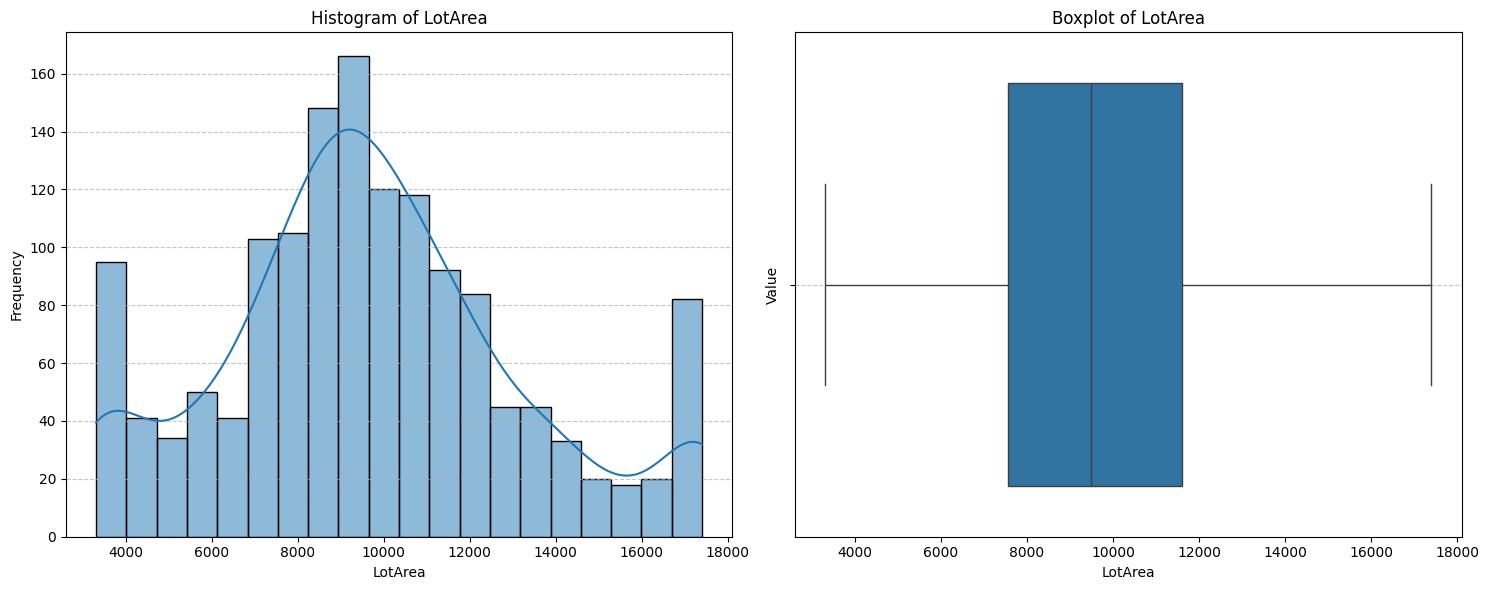

In [5]:
from utils.plotting import DataVisualizer
from utils.helpers import check_and_print_missing_value_counts

check_and_print_missing_value_counts(data, 'LotArea')
visualizer = DataVisualizer(data)
visualizer.plot('LotArea')